In [6]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
combined_df = pd.merge(mouse_drug, clinical_trial, on="Mouse ID", how = "outer")


# Display the data table for preview
combined_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time_tv = combined_df.groupby(['Drug','Timepoint'])
drugtime=drug_time_tv['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
combined_tvmean_summary = pd.DataFrame({"Tumor Volume (mm3)": drugtime})

# Preview DataFrame
combined_tvmean_summary.head(20)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421

In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_time_tv = combined_df.groupby(['Drug','Timepoint'])
drugtime=drug_time_tv['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
combined_tvsem_summary = pd.DataFrame({"Tumor Volume (mm3)": drugtime})

# Preview DataFrame
combined_tvsem_summary.head(20)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358

In [10]:
# Minor Data Munging to Re-Format the Data Frames
reformated_tvmean_summary=pd.pivot_table(combined_tvmean_summary, values=['Tumor Volume (mm3)'], index=['Timepoint'], columns=['Drug'],aggfunc='mean')

# Preview that Reformatting worked
reformated_tvmean_summary.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


TypeError: can only concatenate str (not "int") to str

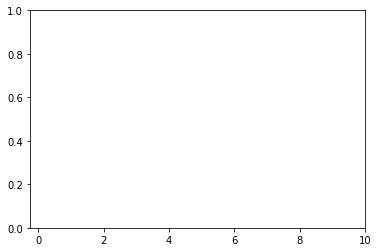

In [13]:
# Set x axis and tick locations
x_axis = np.arange(len(reformated_tvmean_summary))
tick_locations = [value+0.4 for value in x_axis]

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(reformated_tvmean_summary["Tumor Volume (mm3)"])+10)

plt.title("Tumor Reponse to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# create series for plots
capomulin = reformated_tvmean_summary["Drug"]["Capomulin"]
infubinol = reformated_tvmean_summary["Drug"]["Infubinol"]
ketapril= reformated_tvmean_summary["Drug"]["Ketapril"]
placebo = reformated_tvmean_summary["Drug"]["Placebo"]

# Generate the Plot (with Error Bars)

plt.figure(figsize=(20,3))
plt.scatter(x_axis, capomulin,marker="o", facecolors="red", edgecolors="red")
plt.scatter(x_axis, infubinol,marker="o", facecolors="blue", edgecolors="blue")
plt.scatter(x_axis, cketapril,marker="o", facecolors="green", edgecolors="green")
plt.scatter(x_axis, placebo,marker="o", facecolors="black", edgecolors="black")
plt.xticks(tick_locations, reformated_tvmean_summary["Timepoint"], rotation="vertical")


# Save the Figure



In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [14]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_time_met = combined_df.groupby(['Drug','Timepoint'])
drugtime=drug_time_met['Metastatic Sites'].mean()

# Convert to DataFrame
combined_metmean_summary = pd.DataFrame({"Metastatic Sites": drugtime})

# Preview DataFrame
combined_metmean_summary.head(20)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
drug_time_met = combined_df.groupby(['Drug','Timepoint'])
drugtime=drug_time_met['Metastatic Sites'].sem()

# Convert to DataFrame
combined_metsem_summary = pd.DataFrame({"Metastatic Sites": drugtime})

# Preview DataFrame
combined_metsem_summary.head(20)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [19]:
# Minor Data Munging to Re-Format the Data Frames
reformated_metmean_summary=pd.pivot_table(combined_metmean_summary, values=['Metastatic Sites'], index=['Timepoint'], columns=['Drug'],aggfunc='mean')

# Preview that Reformatting worked
reformated_metmean_summary.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
drug_time_mice = combined_df.groupby(['Drug','Timepoint'])
drugtime = drug_time_mice['Mouse ID'].nunique()

# Convert to DataFrame
combined_mice_summary = pd.DataFrame({"Mouse Count": drugtime})

# Preview DataFrame
combined_mice_summary.head(20)

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Ceftamin  0                   25
          5                   21
          10                  20
          15                  19
          20                  18
          25                  18
          30                  16
          35                  14
          40                  14
          45                  13

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [22]:
# Minor Data Munging to Re-Format the Data Frames
reformated_mice_summary=pd.pivot_table(combined_mice_summary, values=['Mouse Count'], index=['Timepoint'], columns=['Drug'],aggfunc='sum')

# Preview the Data Frame
reformated_mice_summary.head()

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       25   
5                  25       21        25       23       23      24       24   
10                 25       20        21       22       21      24       22   
15                 24       19        21       19       21      20       16   
20                 23       18        20       19       20      19       16   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       25        25  
5               25       24        24  
10              24       22        22  
15              24       22        21  
20              23       20        17

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)